In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Access to Dataset
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db/data

In [2]:
# Read the dataset into a DataFrame
df = pd.read_csv("SpotifyFeatures.csv", dtype={"Time Signature": str})

In [3]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Genre**: The genre of the track. It categorizes the music into different styles or types, such as pop, rock, jazz, etc.

**Artist Name**: The name of the artist who performed or created the track.

**Track Name**: The title or name of the track.

**Track ID**: A unique identifier for the track, often used for reference or identification purposes.

**Popularity**: The popularity score of the track. This could be based on factors like the number of plays, likes, or other engagement metrics.

**Acousticness**: A measure of the acoustic characteristics of the track. It represents the confidence measure from 0.0 to 1.0 of whether the track is acoustic.

**Danceability**: A measure of how suitable the track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. It ranges from 0.0 to 1.0.

**Duration (ms)**: The duration of the track in milliseconds.

**Energy**: A measure of the intensity and activity of the track. It represents a perceptual measure of intensity and activity ranging from 0.0 to 1.0.

**Instrumentalness**: A measure indicating whether a track contains no vocals. The value ranges from 0.0 to 1.0, where 1.0 represents high confidence that the track is instrumental.

**Key**: The key of the track, represented as a musical pitch class (e.g., C, D, E, etc.).

**Liveness**: A measure of the presence of an audience in the recording. It ranges from 0.0 to 1.0, with higher values indicating higher probability that the track was performed live.

**Loudness**: The overall loudness of the track in decibels (dB).

**Mode**: The modality of the track, represented as either "Major" or "Minor".

**Speechiness**: A measure of the presence of spoken words in the track. It ranges from 0.0 to 1.0, with higher values indicating a greater presence of spoken words.

**Tempo**: The overall estimated tempo of the track in beats per minute (BPM).

**Time Signature**: The time signature of the track, represented as a fraction (e.g., "4/4" indicating four beats per measure).

**Valence**: A measure of the musical positiveness conveyed by a track. It ranges from 0.0 to 1.0, with higher values indicating more positive (happy, cheerful, euphoric) tracks.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [6]:
#Check for null/missing values
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
missing_values = df.isnull().any(axis=1)
# Filter the DataFrame to show rows with missing values
rows_with_missing_values = df[missing_values]

print(rows_with_missing_values)

        genre        artist_name track_name                track_id  \
208285  World  Elevation Worship        NaN  7BGQCe62A58Q5ZgpQFX93t   

        popularity  acousticness  danceability  duration_ms  energy  \
208285          44         0.019         0.287       350027   0.446   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
208285               0.0   F       0.1    -7.214  Major       0.0317  138.727   

       time_signature  valence  
208285            4/4   0.0387  


In [8]:
#Fill the missing value with "None"
df['track_name'] = df['track_name'].fillna("None")

In [9]:
#Check for null/missing values again
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [10]:
top_popular = df.query('popularity>90', inplace = False).sort_values('popularity', ascending = False )
top_popular[:10]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [66]:
# Filter the DataFrame to include only songs with popularity above 80
popular_songs = df[df['popularity'] > 80]

In [94]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' containing the dataset

# Filter the DataFrame to include only songs with popularity above 90
popular_songs_above_80 = df[df['popularity'] > 80]

# Group by artist_name and count the number of songs above 90
artist_tracks_above_80 = popular_songs_above_80.groupby('artist_name').size().reset_index(name='num_tracks_above_80')

# Calculate the average popularity of songs above 90 for each artist
artist_avg_popularity = popular_songs_above_80.groupby('artist_name')['popularity'].mean().reset_index(name='avg_popularity_above_80')

# Merge the two DataFrames on artist_name
artist_summary = pd.merge(artist_tracks_above_80, artist_avg_popularity, on='artist_name')

# Sort the DataFrame in descending order of the number of tracks above 90
artist_summary.sort_values(by='num_tracks_above_80', ascending=False, inplace=True)

In [95]:
artist_summary.head(10)

,artist_name,num_tracks_above_80,avg_popularity_above_80
17,Ariana Grande,36,89.500000
176,Post Malone,24,88.083333
234,XXXTENTACION,22,86.772727
61,Drake,18,85.000000
70,Eminem,18,82.555556
217,The Weeknd,15,82.400000
124,Lil Baby,15,85.800000
77,Future,12,84.000000
91,J. Cole,12,85.500000
224,Travis Scott,12,86.166667


In [92]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' containing the dataset

# Filter the DataFrame to include only songs with popularity above 90
popular_songs = df[df['popularity']>0]

# Group by artist_name and count the number of songs above 90
artist_tracks = popular_songs.groupby('artist_name').size().reset_index(name='num_tracks')

# Calculate the average popularity of songs above 90 for each artist
artist_avg_popularity = popular_songs.groupby('artist_name')['popularity'].mean().reset_index(name='avg_popularity')

# Merge the two DataFrames on artist_name
artist_summary = pd.merge(artist_tracks, artist_avg_popularity, on='artist_name')

# Sort the DataFrame in descending order of the number of tracks above 90
artist_summary.sort_values(by='num_tracks', ascending=False, inplace=True)

              acousticness  danceability    energy
acousticness      1.000000     -0.364546 -0.725576
danceability     -0.364546      1.000000  0.325807
energy           -0.725576      0.325807  1.000000


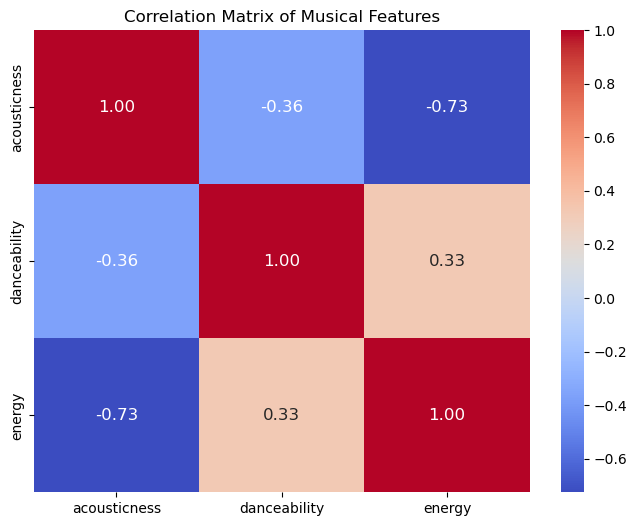

In [73]:

# Calculate pairwise correlations
correlation_matrix = df[['acousticness', 'danceability', 'energy']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of Musical Features')
plt.show()

**Positive Correlations with Popularity**: Features such as loudness (0.363), energy (0.249), danceability (0.257), and valence (0.060) have positive correlations with popularity. This suggests that tracks with higher values of these features tend to be more popular.

**Negative Correlations with Popularity:** Features like acousticness (-0.381), instrumentalness (-0.211), and liveness (-0.168) have negative correlations with popularity. This indicates that tracks with lower acousticness, instrumentalness, and liveness may be more popular.

**Weak Correlations with Popularity:** Some features such as tempo (0.081), duration_ms (0.002), and speechiness (-0.151) have relatively weak correlations with popularity, suggesting that they may have less influence on the popularity of tracks.

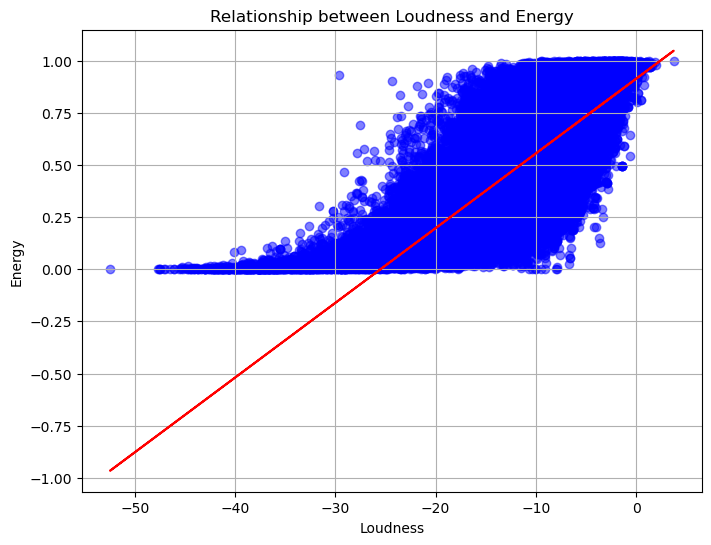

In [57]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['loudness'], df['energy'], color='blue', alpha=0.5)
plt.title('Relationship between Loudness and Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)

# Add a trendline (optional)
z = np.polyfit(df['loudness'], df['energy'], 1)
p = np.poly1d(z)
plt.plot(df['loudness'], p(df['loudness']), color='red')

plt.show()

**Positive Relationship:** Since the correlation coefficient between loudness and energy is approximately 0.816, we expect to see a positive trend in the scatter plot. As the loudness increases, we expect energy to also increase.

**Strength of Relationship:** The scatter plot confirms the strong positive relationship between loudness and energy. We can observe a clear upward trend in the data points, indicating that tracks with higher loudness tend to have higher energy levels.

**Outliers:** There might be some outliers in the data, indicated by points that deviate significantly from the overall trend. These outliers could represent tracks with unusual combinations of loudness and energy.

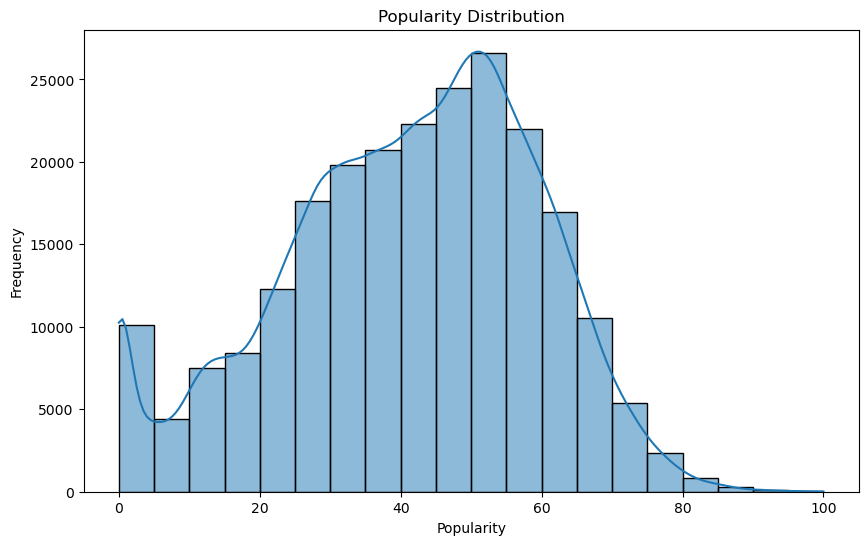

In [26]:
# Plot popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=20, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show()

In [31]:
#Genre Preferences
# Group by genre and calculate mean popularity
genre_popularity = df.groupby('genre')['popularity'].mean()
print(genre_popularity)

genre
A Capella            9.302521
Alternative         50.213430
Anime               24.258729
Blues               34.742879
Children's Music     4.252637
Children’s Music    54.659040
Classical           29.282195
Comedy              21.342630
Country             46.100416
Dance               57.275256
Electronic          38.056095
Folk                49.940209
Hip-Hop             58.423131
Indie               54.701561
Jazz                40.824383
Movie               12.174097
Opera               13.335628
Pop                 66.590667
R&B                 52.308719
Rap                 60.533795
Reggae              35.589328
Reggaeton           37.742915
Rock                59.619392
Ska                 28.612351
Soul                47.027836
Soundtrack          33.954800
World               35.524077
Name: popularity, dtype: float64


**Genres with Highest Popularity:**

1. **Pop:** The "Pop" genre has the highest mean popularity value of approximately 66.59. Pop music is known for its widespread appeal and commercial success, often featuring catchy melodies and relatable lyrics that resonate with a broad audience. The high popularity of pop music is reflected in its elevated mean popularity value.
2. **Hip-Hop and Rap:** Both "Hip-Hop" and "Rap" genres also have high mean popularity values, with approximately 58.42 and 60.53 respectively. These genres have enjoyed significant mainstream success in recent years, with artists achieving widespread recognition and dominating music charts worldwide.

**Genres with Lowest Popularity:**

1. **Children's Music:** The "Children's Music" genre has one of the lowest mean popularity values, approximately 4.25. This genre primarily caters to children and may not appeal as strongly to a broader audience. The target audience for children's music is relatively niche, resulting in lower overall popularity compared to genres targeting a wider demographic.
2. **Opera:** The "Opera" genre also has a relatively low mean popularity value of approximately 13.34. Opera music, characterized by its elaborate compositions and dramatic performances, may have a more limited audience appeal compared to mainstream genres like pop and hip-hop.
3. **A Capella:** The "A Capella" genre has a mean popularity value of approximately 9.30, indicating lower overall popularity. A Capella music, which features vocal performances without instrumental accompaniment, may have a specialized audience and niche appeal compared to genres with broader commercial appeal.

In [32]:
# Count tracks per artist
artist_counts = df['artist_name'].value_counts()
print(artist_counts)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64


In [34]:
#Musical Features: descriptive statistics to analyze features like acousticness, danceability, energy, etc
# Summary statistics of musical features
feature_stats = df[['acousticness', 'danceability', 'energy']].describe()
print(feature_stats)

        acousticness   danceability         energy
count  232725.000000  232725.000000  232725.000000
mean        0.368560       0.554364       0.570958
std         0.354768       0.185608       0.263456
min         0.000000       0.056900       0.000020
25%         0.037600       0.435000       0.385000
50%         0.232000       0.571000       0.605000
75%         0.722000       0.692000       0.787000
max         0.996000       0.989000       0.999000


              acousticness  danceability    energy
acousticness      1.000000     -0.364546 -0.725576
danceability     -0.364546      1.000000  0.325807
energy           -0.725576      0.325807  1.000000


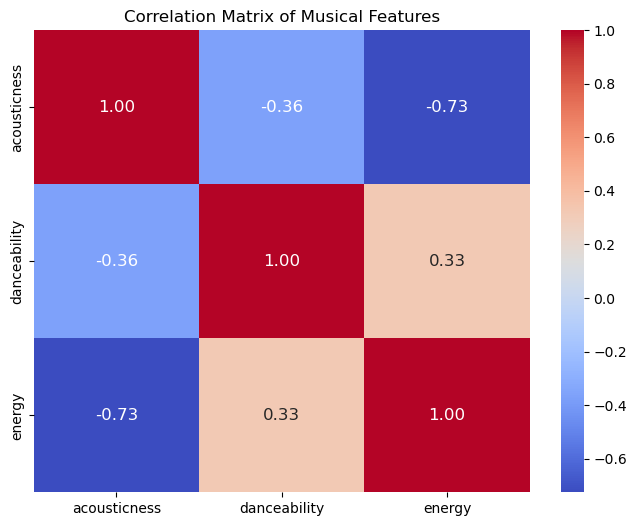

In [65]:
# Calculate pairwise correlations
correlation_matrix = df[['acousticness', 'danceability', 'energy']].corr()

print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of Musical Features')
plt.show()

**Acousticness and Danceability:**

1. There is a moderate negative correlation (-0.3645) between acousticness and danceability.
2. Tracks with higher acousticness tend to have lower danceability, while tracks with lower acousticness tend to have higher danceability.
**Acousticness and Energy:**

1. There is a strong negative correlation (-0.7256) between acousticness and energy.
2. Tracks with higher acousticness tend to have lower energy levels, while tracks with lower acousticness tend to have higher energy levels.
**Danceability and Energy:**

1. There is a moderate positive correlation (0.3258) between danceability and energy.
2. Highly danceable tracks are more likely to have higher energy levels, while less danceable tracks are more likely to have lower energy levels.

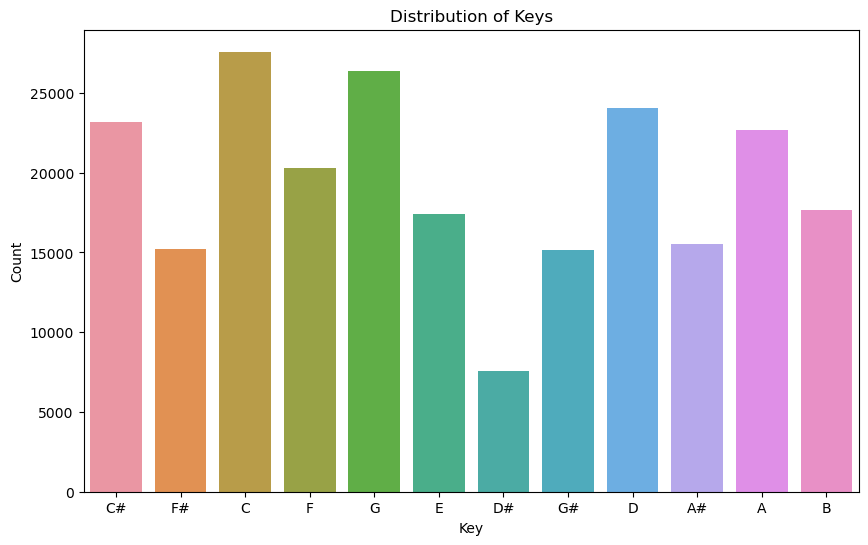

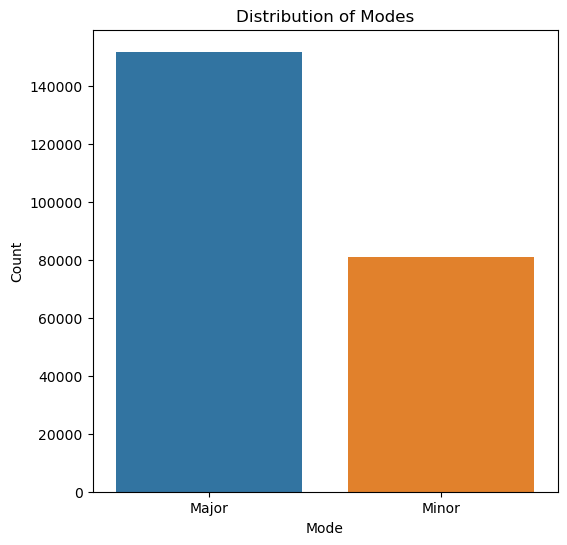

In [35]:
# Key Modes
# Plot distribution of keys
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Keys')
plt.show()

# Plot distribution of modes
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Distribution of Modes')
plt.show()

Text(0, 0.5, 'Genres')

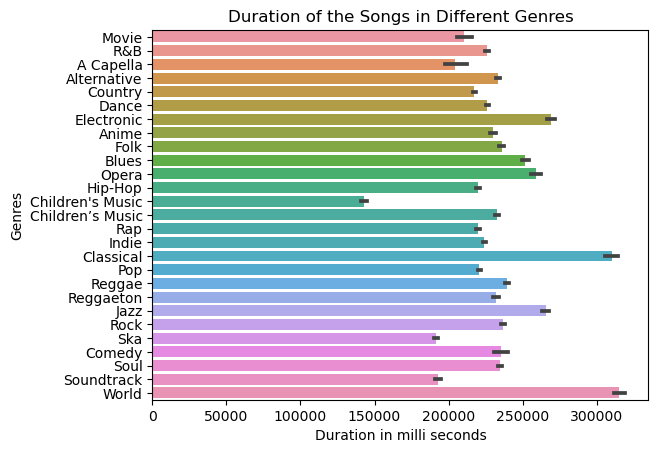

In [63]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap= True)
sns.barplot (y='genre', x='duration_ms', data=df)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

Based on the observation that the Children's music genre appears to have the shortest average song duration, while World and Classical genres have the highest average song durations.

**Children's Music Genre:**

The shorter average duration of songs in the Children's music genre may be due to the target audience's attention span. Children's songs are often designed to be shorter in length to maintain engagement and cater to the preferences of younger listeners.

**World and Classical Genres:**

The longer average durations of songs in the World and Classical genres are characteristic of these genres' compositions. Both World and Classical music often feature longer and more complex compositions, including symphonies, operas, and traditional folk music pieces, which contribute to their longer average durations.

**Genre Characteristics:**

The differences in average song durations across genres reflect the diversity of musical styles, structures, and cultural contexts within each genre. Different genres have distinct conventions and traditions regarding song length, tempo, and composition complexity.

In [38]:
# Conduct hypothesis testing or statistical analysis
# Test if there's a significant difference in popularity between Major and Minor mode tracks using a t-test.
from scipy.stats import ttest_ind

major_popularity = df[df['mode'] == 'Major']['popularity']
minor_popularity = df[df['mode'] == 'Minor']['popularity']

t_stat, p_value = ttest_ind(major_popularity, minor_popularity)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -34.11938411476882, p-value: 1.6280496949250176e-254


The result of the t-statistic test on popularity between tracks in Major and Minor modes shows a highly negative t-statistic value of approximately -34.12 and an extremely small p-value of approximately 1.63e-254.

This suggests that there is a statistically significant difference in popularity between tracks in Major and Minor modes. The negative t-statistic value indicates that, on average, tracks in Major mode tend to be more popular than tracks in Minor mode.
The small p-value indicates that the observed difference in popularity between Major and Minor mode tracks is highly unlikely to have occurred by random chance alone. Therefore, we can reject the null hypothesis that there is no difference in popularity between Major and Minor mode tracks in favor of the alternative hypothesis that there is a difference.

In simpler terms, the result suggests that the mode of a track (Major or Minor) has a significant impact on its popularity, with Major mode tracks generally being more popular than Minor mode tracks.

**ANOVA (Analysis of Variance)**:
We'll conduct ANOVA to see if there are significant differences in popularity across different genres.

In [41]:
# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('popularity ~ genre', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df             F  PR(>F)
genre     5.543262e+07      26.0  23000.627599     0.0
Residual  2.156975e+07  232698.0           NaN     NaN


1. The very low p-value (close to 0) indicates that there is strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there are significant differences in popularity across different genres.

2. The large F-statistic indicates that the variation in popularity across different genres is much greater than what would be expected due to random chance alone.

3. The sum of squares for the genre variable is much larger than the sum of squares for the residuals, indicating that the genre variable explains a significant amount of the variance in popularity.

In summary, the ANOVA test suggests that the variable genre has a significant impact on the popularity of tracks, with different genres having significantly different levels of popularity.

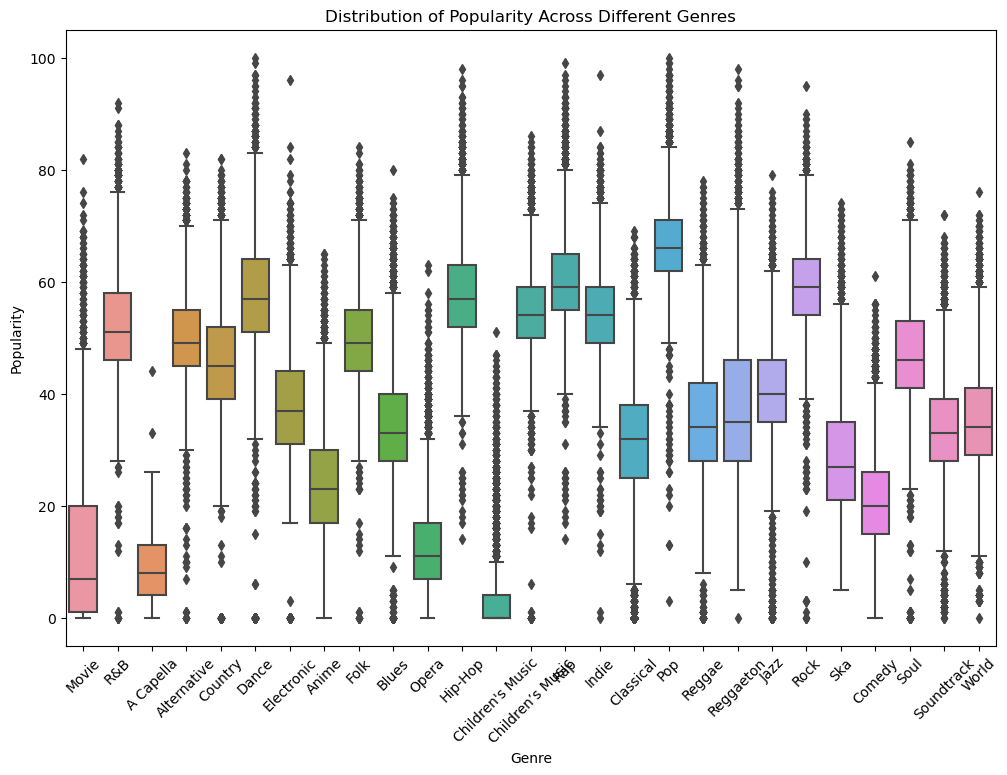

In [43]:
# Create box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='popularity', data=df)
plt.title('Distribution of Popularity Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Regression Analysis:
We'll perform a linear regression to predict popularity based on acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence.

In [42]:
# Regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 255.1492461730597


In [47]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r_squared}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.23369773186406417
Root Mean Squared Error (RMSE): 15.973391818053537


A relatively low R-squared value (0.234) indicates that the regression model explains only a moderate amount of the variability in popularity based on the given features.

The RMSE value of approximately 15.97 suggests that, on average, the predicted popularity values are off by approximately 15.97 units from the actual popularity values. This can be considered as a measure of the model's accuracy, with lower RMSE values indicating better accuracy.

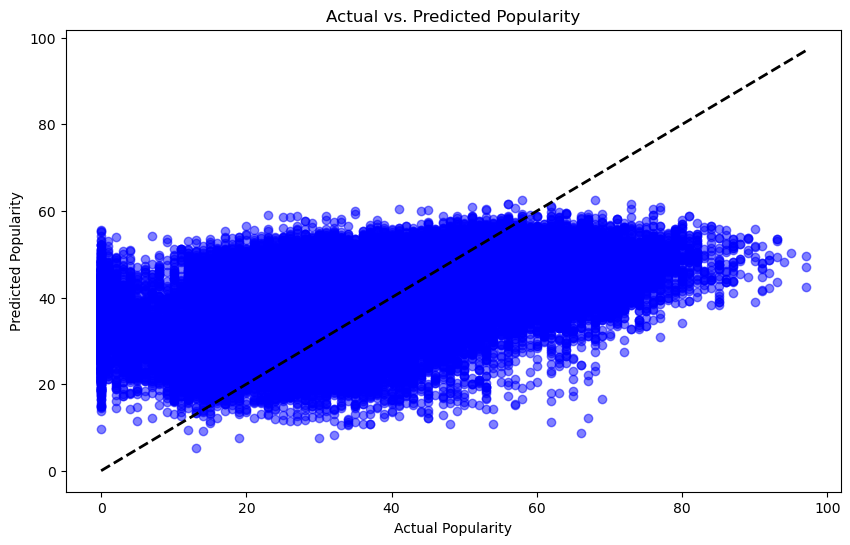

In [44]:
# Plot actual data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

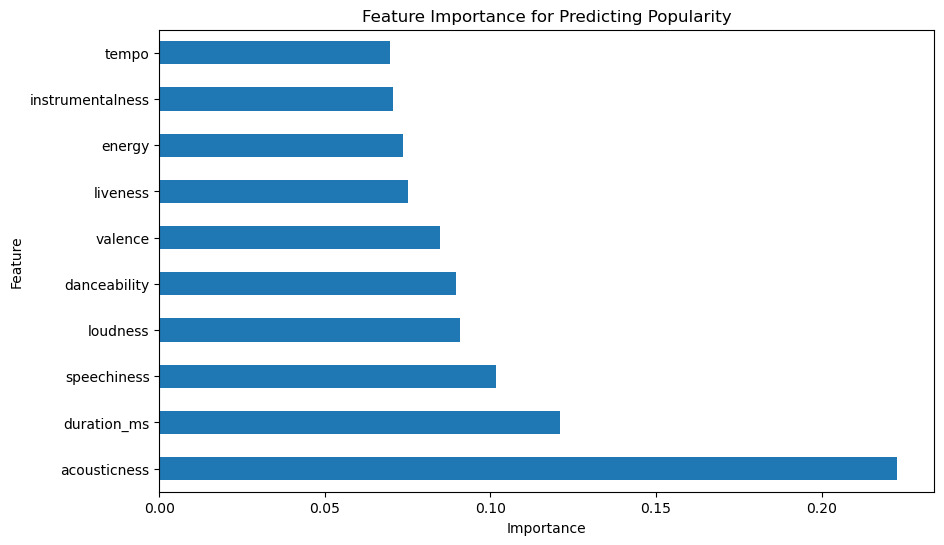

In [45]:
# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for Predicting Popularity')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Acousticness Importance**: The feature importance value for acousticness suggests that changes in this feature have a relatively stronger impact on the predicted popularity of tracks compared to changes in other features.

**Interpretation**: A high importance of acousticness suggests that the acoustic characteristics of a track (how acoustic it sounds) play a significant role in determining its popularity. This could imply that tracks with higher acousticness may tend to be more popular or vice versa, depending on the direction of the relationship.

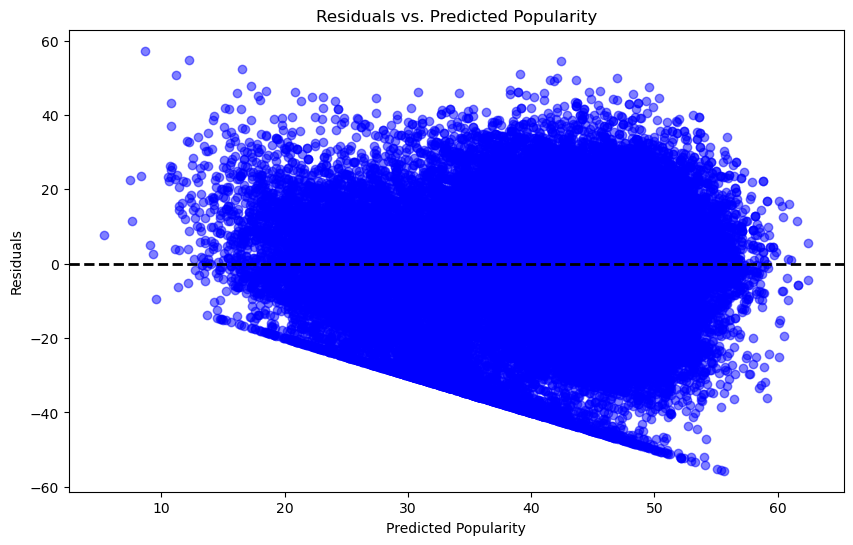

In [46]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Popularity')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.show()